In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Assumption check

### Linearity check

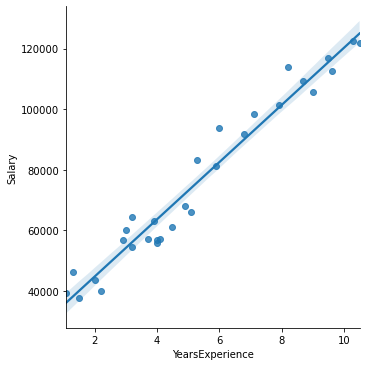

In [7]:
sns.lmplot(data = salary_data, x = 'YearsExperience', y = 'Salary')

#### OBSERVATOIN 
linearity check **passed**

### Normality check

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

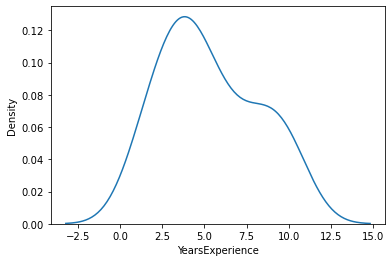

In [10]:
sns.distplot(salary_data.YearsExperience, hist=False)

In [11]:
salary_data.YearsExperience.skew()

0.37956024064804106

##### Normality check passed

### Multicolinearity check

multicolinearity only done in multilinear regression

### 4. No autoregression

### 5. Homoscadascity Check | 6. Zero Residual Mean Check


done in post modeling and training

## Model building

In [12]:
import statsmodels.formula.api as smf

In [13]:
model = smf.ols(formula='Salary~YearsExperience', data = salary_data).fit()

In [14]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
y_predicted = model.predict(salary_data['YearsExperience'])

In [25]:
data1 = pd.DataFrame({'YearsExperience':[10,12,30,40]})
data1

,YearsExperience
0,10
1,12
2,30
3,40


In [26]:
model.predict(data1)

0    120291.823413
1    139191.748056
2    309291.069842
3    403790.693057
dtype: float64

### zero residual test

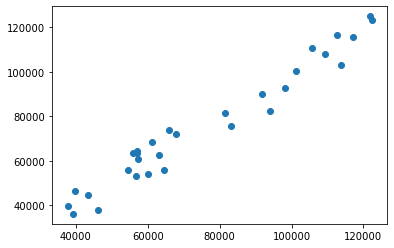

In [30]:
plt.scatter(x = salary_data.Salary, y = y_predicted)

##### OBSERVATION
zero residual test **passed**